# 00 Get the Data

In [2]:
import wget
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv


In [185]:
import wget
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
wget.download(data)


100% [............................................................................] 874188 / 874188

In [206]:
import pandas as pd
df = pd.read_csv('car_fuel_efficiency.csv')

In [207]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

## imports

In [208]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Preparing the dataset


Preparation:

- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.


##### Missing values 

In [209]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [210]:
df.num_cylinders          


0       3.0
1       5.0
2       NaN
3       4.0
4       1.0
       ... 
9699    5.0
9700    NaN
9701    2.0
9702    4.0
9703    3.0
Name: num_cylinders, Length: 9704, dtype: float64

In [211]:
for c in ['num_cylinders', 'horsepower', 'acceleration', 'num_doors']:
    df[c] = df[c].replace(to_replace=np.nan, value=0)

In [212]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

#####  train/validation/test split with 60%/20%/20% distribution.

In [213]:
df.describe().round()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.0,9704.0,9704.0,9704.0,9704.0,9704.0,9704.0,9704.0
mean,200.0,4.0,139.0,3001.0,14.0,2011.0,-0.0,15.0
std,49.0,2.0,48.0,498.0,5.0,7.0,1.0,3.0
min,10.0,0.0,0.0,953.0,0.0,2000.0,-4.0,6.0
25%,170.0,2.0,124.0,2666.0,13.0,2006.0,-1.0,13.0
50%,200.0,4.0,146.0,2993.0,15.0,2012.0,0.0,15.0
75%,230.0,5.0,168.0,3335.0,16.0,2017.0,1.0,17.0
max,380.0,13.0,271.0,4739.0,24.0,2023.0,4.0,26.0


In [193]:
# Convert 'origin' (categorical) to one-hot encoded numeric variables
'''
df = pd.get_dummies(df, columns=['origin'], prefix='origin', drop_first=True)
df = pd.get_dummies(df, columns=['fuel_type'], prefix='origin', drop_first=True)
df = pd.get_dummies(df, columns=['drivetrain'], prefix='origin', drop_first=True)
'''

In [214]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [215]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = (df_train.fuel_efficiency_mpg).values
y_val = (df_val.fuel_efficiency_mpg).values

y_train = (df_train.fuel_efficiency_mpg).astype('int').values
y_val = (df_val.fuel_efficiency_mpg).astype('int').values
y_test = (df_val.fuel_efficiency_mpg).astype('int').values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

##### Use DictVectorizer(sparse=True) to turn the dataframes into matrices.


In [225]:
from sklearn.feature_extraction import DictVectorizer

dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)


# Question 1

Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

Train a model with max_depth=1.


Which feature is used for splitting the data?

- __'vehicle_weight'__
- 'model_year'
- 'origin'
- 'fuel_type'

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text

In [147]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [148]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- vehicle_weight <= 3000.14
|   |--- class: 16
|--- vehicle_weight >  3000.14
|   |--- class: 13



In [ ]:

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

In [63]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### example

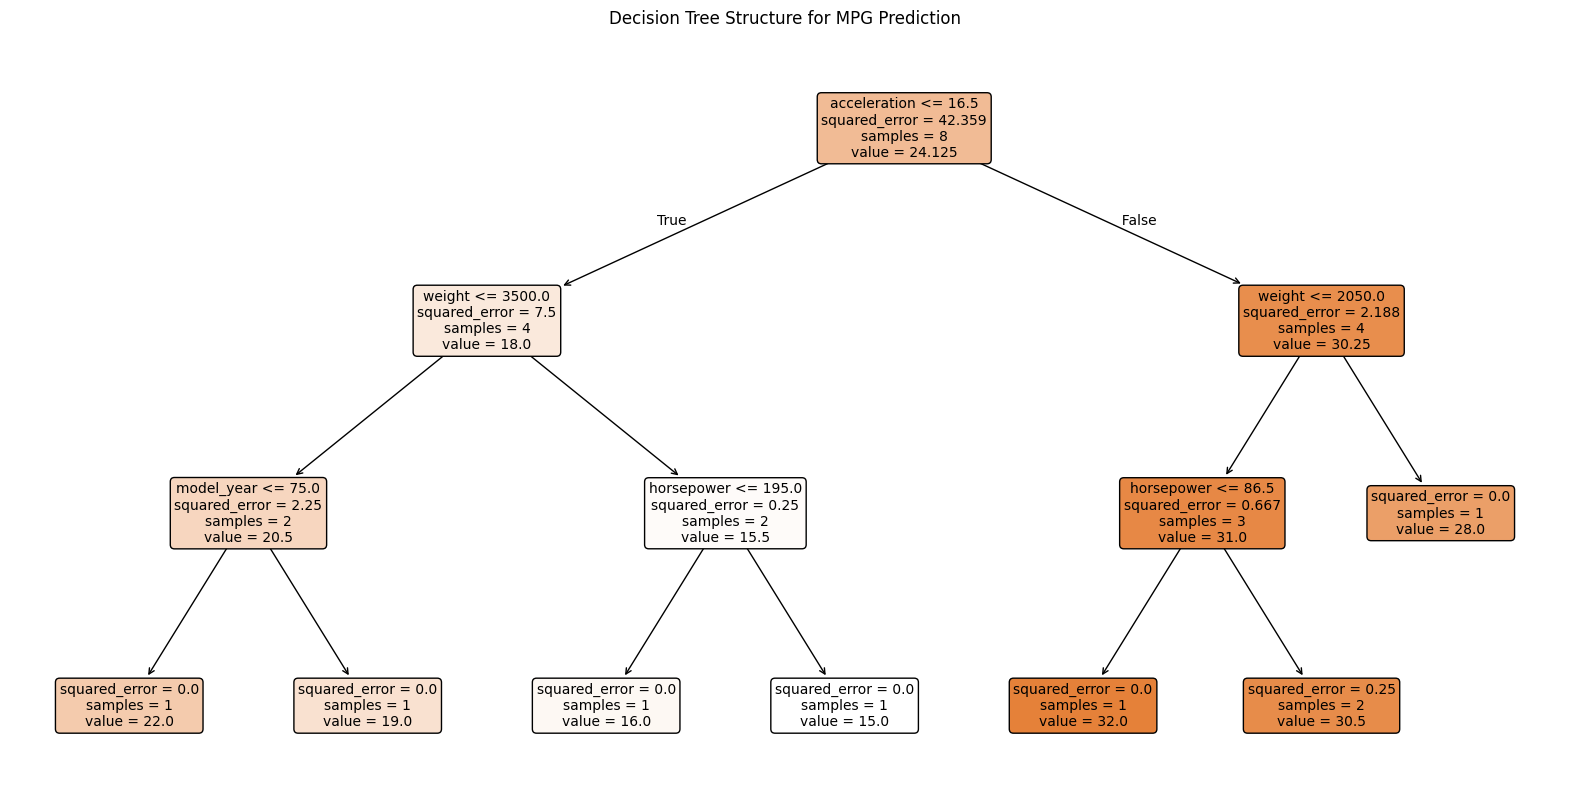


Feature Importances:
cylinders: 0.0000
displacement: 0.0000
horsepower: 0.0059
weight: 0.0938
acceleration: 0.8870
model_year: 0.0133


In [75]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
# Create a sample dataset (replace with your actual car fuel mpg data)
data = {
    'cylinders': [4, 6, 8, 4, 6, 8, 4, 6, 8, 4],
    'displacement': [100, 250, 400, 90, 220, 380, 110, 260, 420, 95],
    'horsepower': [90, 150, 200, 85, 140, 190, 95, 160, 210, 88],
    'weight': [2000, 3000, 4000, 1900, 2800, 3900, 2100, 3100, 4100, 1950],
    'acceleration': [18, 15, 12, 19, 16, 13, 17, 14, 11, 20],
    'model_year': [70, 72, 74, 71, 73, 75, 76, 77, 78, 79],
    'mpg': [30, 20, 15, 32, 22, 16, 28, 19, 14, 31]
}
df = pd.DataFrame(data)

# Define features (X) and target (y)
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
X = df[features]
y = df['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regressor model
regressor = DecisionTreeRegressor(random_state=42, max_depth=3) # Limiting depth for better visualization
regressor.fit(X_train, y_train)

# Visualize the Decision Tree to see the splits
plt.figure(figsize=(20, 10))
plot_tree(regressor, 
          feature_names=features, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Structure for MPG Prediction")
plt.show()

# The `feature_importances_` attribute reveals the importance of each feature in making splits
print("\nFeature Importances:")
for feature, importance in zip(features, regressor.feature_importances_):
    print(f"{feature}: {importance:.4f}")


### Back to your problem !

In [ ]:
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [124]:

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regressor model
regressor = DecisionTreeRegressor(random_state=1, max_depth=1) # Limiting depth for better visualization
regressor.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [125]:
mdl.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1.])

In [126]:
print(export_text(regressor, feature_names=dv.get_feature_names_out()))

|--- vehicle_weight <= 3000.14
|   |--- value: [16.44]
|--- vehicle_weight >  3000.14
|   |--- value: [12.51]



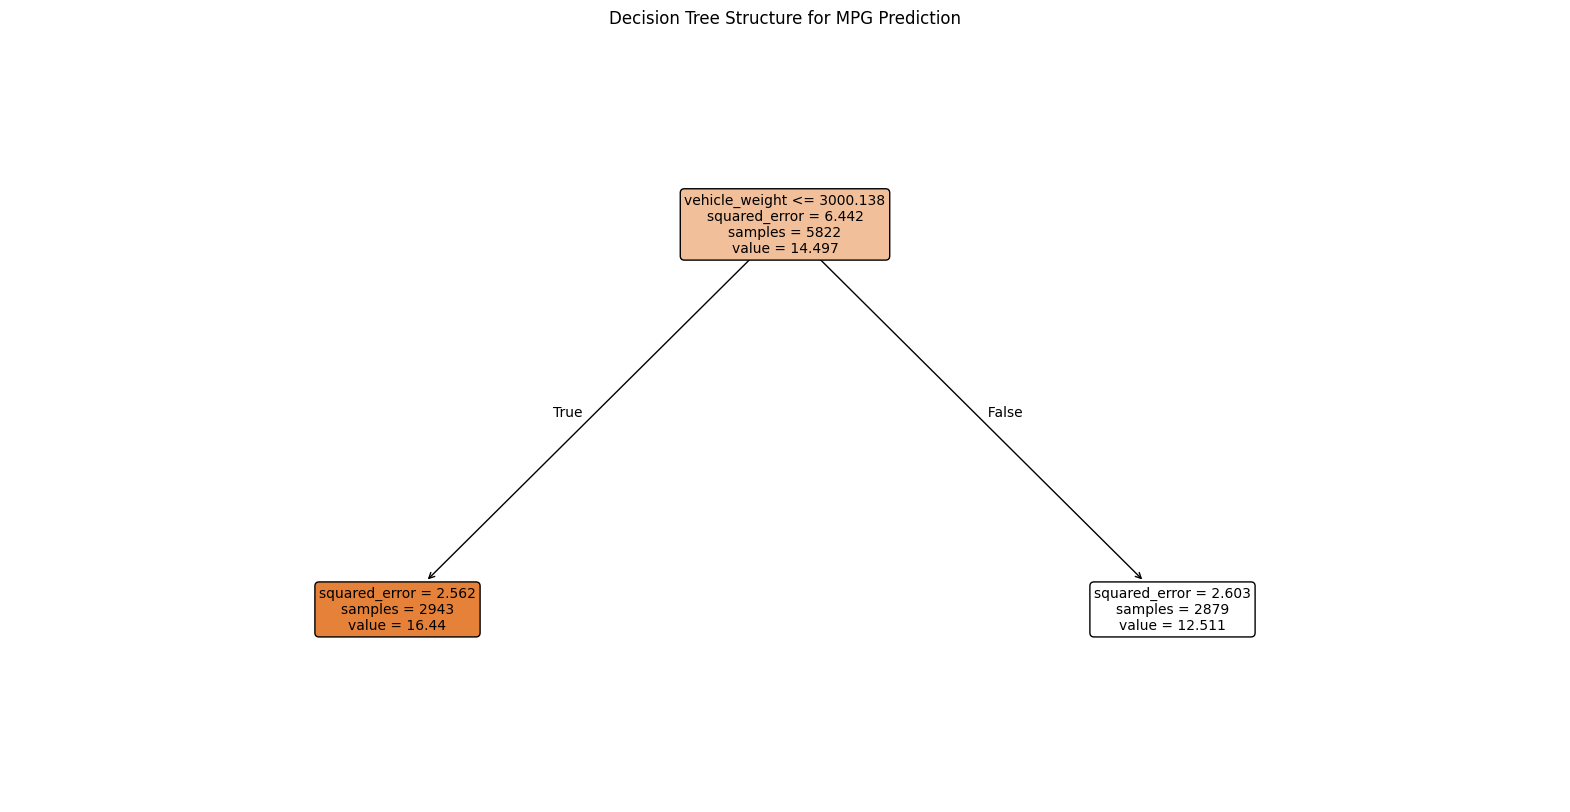

In [146]:


features =  dv.get_feature_names_out() 
'''
    ['acceleration', 'drivetrain=All-wheel drive',
        'drivetrain=Front-wheel drive', 'engine_displacement',
        'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
        'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
        'origin=Europe', 'origin=USA', 'vehicle_weight']
'''
# Visualize the Decision Tree to see the splits
plt.figure(figsize=(20, 10))
plot_tree(regressor, 
          feature_names=features, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Structure for MPG Prediction")
plt.show()





# Question 2

Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on the validation data?

- 0.045
- **0.45**
- 4.5
- 45.0

### example 

In [266]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text

In [267]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [268]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((5822, 14), (5822,), (1941, 14), (1941,))

In [269]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)


,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [270]:
# Step 6: Predict and Evaluate
# Make predictions on the validation set
y_pred = rf.predict(X_val)


In [271]:
y_pred.shape, y_val.shape

((1941,), (1941,))

In [272]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

In [273]:
print(f"RMSE on the validation data: {rmse:.3f}")

RMSE on the validation data: 0.552


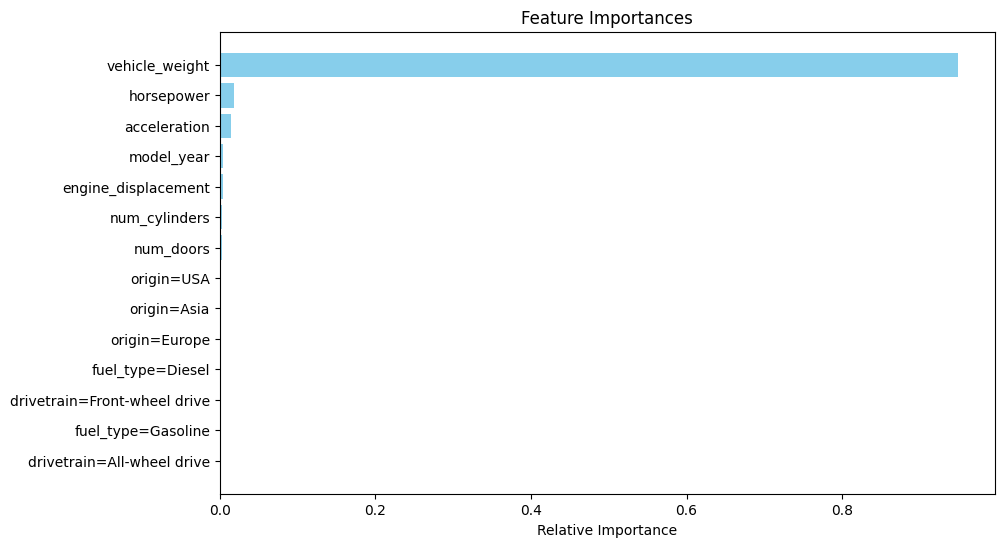

In [274]:
# Get feature importances
importances = rf.feature_importances_
features = list(dv.get_feature_names_out())
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Question 3

Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.

Set random_state to 1.

Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

- 10
- 25
- **80**
- 200
                                                                                      
If it doesn't stop improving, use the latest iteration number in your answer.

In [275]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [276]:
X_val.shape, y_val.shape

((1941, 14), (1941,))

In [325]:
rmse_scores = []

for i in range(10, 201, 10):
    
    rf = RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)
    mdl = rf.fit(X_train, y_train)
    y_pred = mdl.predict(X_val)
    rmse_score = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse =  round(rmse_score.item(), 3)
    rmse_scores.append([i, round(rmse, 3)])
    print((i, rmse))




(10, 0.552)
(20, 0.54)
(30, 0.538)
(40, 0.538)
(50, 0.536)
(60, 0.535)
(70, 0.535)
(80, 0.534)
(90, 0.534)
(100, 0.533)
(110, 0.533)
(120, 0.534)
(130, 0.534)
(140, 0.533)
(150, 0.533)
(160, 0.533)
(170, 0.533)
(180, 0.533)
(190, 0.533)
(200, 0.534)


In [322]:
rmse_min = np.min(rmse_scores)
rmse_min

np.float64(0.533)

In [323]:
rmse_df = pd.DataFrame(data= rmse_scores, columns =['estimators', 'RMSE'])

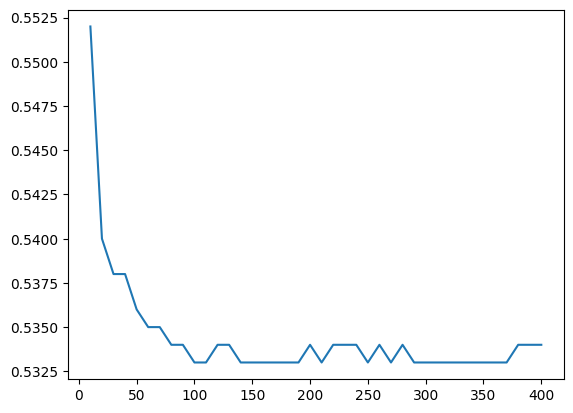

In [324]:
plt.plot(rmse_df.estimators, rmse_df.RMSE)

### Example

In [262]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# 1. Load sample data (California Housing dataset)
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train a model and calculate RMSE
def train_and_evaluate(n_estimators_value, X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=n_estimators_value, random_state=42)
    model.fit(X_train2, y_train2)
    predictions = model.predict(X_test2)
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return rmse

# 2. Train and evaluate Model A (original n_estimators)
rmse_model_a = train_and_evaluate(n_estimators_value=10, X_train=X_train2, y_train=y_train2, X_test=X_test2, y_test=y_test2)
print(f"RMSE with 10 estimators: {rmse_model_a:.4f}")

# 3. Train and evaluate Model B (changed n_estimators)
rmse_model_b = train_and_evaluate(n_estimators_value=100, X_train=X_train2, y_train=y_train2, X_test=X_test2, y_test=y_test2)
print(f"RMSE with 100 estimators: {rmse_model_b:.4f}")

# 4. Calculate the improvement
if rmse_model_b < rmse_model_a:
    absolute_improvement = rmse_model_a - rmse_model_b
    # Percentage improvement (lower RMSE is better)
    percentage_improvement = (absolute_improvement / rmse_model_a) * 100
    print(f"\nModel B (100 estimators) performed better.")
    print(f"Absolute RMSE improvement: {absolute_improvement:.4f}")
    print(f"Percentage improvement: {percentage_improvement:.2f}%")
elif rmse_model_b > rmse_model_a:
    print(f"\nModel A (10 estimators) performed better, no improvement with 100 estimators.")
else:
    print(f"\nBoth models achieved the same RMSE.")

RMSE with 10 estimators: 0.5331
RMSE with 100 estimators: 0.5053

Model B (100 estimators) performed better.
Absolute RMSE improvement: 0.0278
Percentage improvement: 5.21%


# Question 4

Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
        - try different values of n_estimators from 10 till 200 (with step 10)
        - calculate the mean RMSE
- Fix the random seed: random_state=1
What's the best max_depth, using the mean RMSE?

- **10**
- 15
- 20
- 25

In [333]:
rmse_estimators = []
rmse_depth=[]
for d in  [10, 15, 20, 25]:
    rmse_estimators = []

    for i in range(10, 201, 10): 
    
        rf = RandomForestRegressor(n_estimators=i,  max_depth=d,random_state=1, n_jobs=-1)
        mdl = rf.fit(X_train, y_train)
        y_pred = mdl.predict(X_val)
        rmse_score = np.sqrt(mean_squared_error(y_val, y_pred))
        print(d, i, rmse_score)
        rmse =  round(rmse_score.item(), 3)
        
        #rmse_scores.append([d, i, rmse])
        rmse_scores.append([d, i, rmse_score])

        rmse_estimators.append(rmse_score)
        #print((d, i, rmse))
    min_rmse_estimators = min(rmse_estimators)
    print(d, min_rmse_estimators)
    print('=================================================================================')
    rmse_depth.append([d, min_rmse_estimators])
    


10 10 0.5404751937878135
10 20 0.5344416339028951
10 30 0.5317714794983094
10 40 0.5300850144180876
10 50 0.5283949387715948
10 60 0.5285284625586313
10 70 0.5282109778189568
10 80 0.5277257804306912
10 90 0.5275431436051546
10 100 0.5272345778734613
10 110 0.5266213853656143
10 120 0.5274769151164979
10 130 0.527740708058652
10 140 0.5276513712440474
10 150 0.5276421726551859
10 160 0.5277432913925799
10 170 0.5276143036467503
10 180 0.5276890518689757
10 190 0.527981354538037
10 200 0.5280299937078299
10 0.5266213853656143
15 10 0.5535898883531506
15 20 0.5427786637180402
15 30 0.5404353774101169
15 40 0.538705096017994
15 50 0.5363804200210924
15 60 0.5352114885577147
15 70 0.5346971906379069
15 80 0.5340355671011783
15 90 0.5338420590964278
15 100 0.5332750446294546
15 110 0.5325089529741852
15 120 0.5334272501548515
15 130 0.5334041051360101
15 140 0.5331646010054897
15 150 0.5330198370098328
15 160 0.5330056271621767
15 170 0.5327372221377891
15 180 0.5327762897931694
15 190 0.53

In [331]:
rmse_depth

[[10, np.float64(0.5266213853656142)],
 [15, np.float64(0.5325089529741852)],
 [20, np.float64(0.5330026119077108)],
 [25, np.float64(0.5325280472918882)]]

In [332]:
min(rmse_depth)

[10, np.float64(0.5266213853656142)]

# Question 5


We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
- n_estimators=10,
- max_depth=20,
- random_state=1,
- n_jobs=-1 (optional)

Get the feature importance information from this model

What's the most important feature (among these 4)?

- **vehicle_weight**
- horsepower
- acceleration
- engine_displacement

In [338]:
i=10
d = 20

rf = RandomForestRegressor(n_estimators=i,  max_depth=d,random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


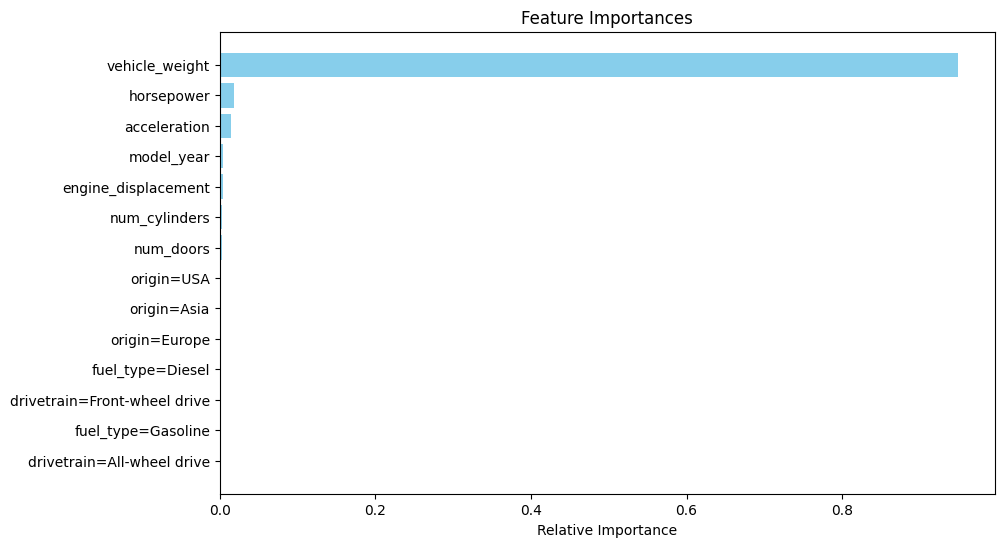

In [339]:
# Get feature importances
importances = rf.feature_importances_
features = list(dv.get_feature_names_out())
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### our example 

In [340]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np



# 1. Train the model
# Using RandomForestRegressor as a tree-based model
model = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)

model.fit(X_train, y_train)


,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [343]:

# 2. Get feature importance information
importances = model.feature_importances_
feature_names = dv.get_feature_names_out()
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feature_importances

vehicle_weight                  0.948906
horsepower                      0.017737
acceleration                    0.014435
model_year                      0.004654
engine_displacement             0.004618
num_cylinders                   0.003128
num_doors                       0.002410
origin=USA                      0.000861
origin=Asia                     0.000642
origin=Europe                   0.000640
fuel_type=Diesel                0.000566
drivetrain=Front-wheel drive    0.000488
fuel_type=Gasoline              0.000486
drivetrain=All-wheel drive      0.000429
dtype: float64

In [344]:

# 3. Find the most important feature
most_important_feature = feature_importances.index[0]
importance_value = feature_importances.values[0]

print("Feature Importances:")
print(feature_importances)
print(f"\n The most important feature is: **{most_important_feature}** with an importance of {importance_value:.4f}")

Feature Importances:
vehicle_weight                  0.948906
horsepower                      0.017737
acceleration                    0.014435
model_year                      0.004654
engine_displacement             0.004618
num_cylinders                   0.003128
num_doors                       0.002410
origin=USA                      0.000861
origin=Asia                     0.000642
origin=Europe                   0.000640
fuel_type=Diesel                0.000566
drivetrain=Front-wheel drive    0.000488
fuel_type=Gasoline              0.000486
drivetrain=All-wheel drive      0.000429
dtype: float64

 The most important feature is: **vehicle_weight** with an importance of 0.9489


In [371]:
r = export_text(rf.estimators_[0], feature_names=feature_names)
#print(r)


# Question 6


Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:

Which eta leads to the best RMSE score on the validation dataset?

- 0.3
- **0.1**

Both give equal value

In [389]:
# 1 import xgb

import xgboost as xgb

In [390]:
# 2 Create DMatrix for train and validation
features = dv.get_feature_names_out()
features
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [405]:
# 3 create a watchlist 
watchlist = [(dtrain, 'train'), (dval, 'val')]
rmse_eta = {}

In [406]:
### eta = 0.3

In [407]:
%%capture output 
evals_result = {}
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100, 
                  verbose_eval=5,
                  evals=watchlist,
                 evals_result=evals_result,)



In [408]:
rmse_eta_min={}

In [409]:
rmse_eta[xgb_params['eta']] = evals_result['val']['rmse']

In [411]:
rmse_eta_min[xgb_params['eta']] = min(rmse_eta[xgb_params['eta']])

In [412]:
rmse_eta_min

{0.3: 0.5260295917278216}

In [413]:
evals_result = {}
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100, 
                  verbose_eval=5,
                  evals=watchlist,
                 evals_result=evals_result,)

[0]	train-rmse:2.30044	val-rmse:2.36010
[5]	train-rmse:1.43553	val-rmse:1.47393
[10]	train-rmse:0.94819	val-rmse:0.98170
[15]	train-rmse:0.68886	val-rmse:0.72621
[20]	train-rmse:0.55795	val-rmse:0.60541
[25]	train-rmse:0.49463	val-rmse:0.55349
[30]	train-rmse:0.46320	val-rmse:0.53231
[35]	train-rmse:0.44529	val-rmse:0.52369
[40]	train-rmse:0.43418	val-rmse:0.51962
[45]	train-rmse:0.42545	val-rmse:0.51840
[50]	train-rmse:0.41779	val-rmse:0.51822
[55]	train-rmse:0.41277	val-rmse:0.51855
[60]	train-rmse:0.40740	val-rmse:0.51868
[65]	train-rmse:0.40432	val-rmse:0.51907
[70]	train-rmse:0.40070	val-rmse:0.51913
[75]	train-rmse:0.39836	val-rmse:0.51950
[80]	train-rmse:0.39445	val-rmse:0.52004
[85]	train-rmse:0.39055	val-rmse:0.52008
[90]	train-rmse:0.38541	val-rmse:0.52072
[95]	train-rmse:0.38124	val-rmse:0.52089
[99]	train-rmse:0.37721	val-rmse:0.52133


In [414]:
rmse_eta[xgb_params['eta']] =evals_result['val']['rmse']

In [415]:
rmse_eta_min[xgb_params['eta']] = min(rmse_eta[xgb_params['eta']])

In [416]:
rmse_eta_min

{0.3: 0.5260295917278216, 0.1: 0.517998404544368}